# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [137]:
batch_size = 100 #1000 Tentei igualar ao gráfico do professor, retirar comentario e o número 60 para voltar ao original

### Carregamento, criação dataset e do dataloader

In [138]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [139]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 600


## Modelo

In [140]:
model = torch.nn.Linear(28*28, 10)

In [141]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.2491,  0.1897, -0.0286, -0.4014, -0.7494,  0.6804, -0.0273,  0.1857,
         -0.6713,  0.4895]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [142]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [143]:
#R1

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'época:{i}/{n_epochs -1} batch: {k}/{len(loader_train)}')

época:0/4 batch: 0/600
época:0/4 batch: 1/600
época:0/4 batch: 2/600
época:0/4 batch: 3/600
época:0/4 batch: 4/600
época:0/4 batch: 5/600
época:0/4 batch: 6/600
época:0/4 batch: 7/600
época:0/4 batch: 8/600
época:0/4 batch: 9/600
época:0/4 batch: 10/600
época:0/4 batch: 11/600
época:0/4 batch: 12/600
época:0/4 batch: 13/600
época:0/4 batch: 14/600
época:0/4 batch: 15/600
época:0/4 batch: 16/600
época:0/4 batch: 17/600
época:0/4 batch: 18/600
época:0/4 batch: 19/600
época:0/4 batch: 20/600
época:0/4 batch: 21/600
época:0/4 batch: 22/600
época:0/4 batch: 23/600
época:0/4 batch: 24/600
época:0/4 batch: 25/600
época:0/4 batch: 26/600
época:0/4 batch: 27/600
época:0/4 batch: 28/600
época:0/4 batch: 29/600
época:0/4 batch: 30/600
época:0/4 batch: 31/600
época:0/4 batch: 32/600
época:0/4 batch: 33/600
época:0/4 batch: 34/600
época:0/4 batch: 35/600
época:0/4 batch: 36/600
época:0/4 batch: 37/600
época:0/4 batch: 38/600
época:0/4 batch: 39/600
época:0/4 batch: 40/600
época:0/4 batch: 41/600
ép

In [144]:
print('Final loss:', loss.data)

Final loss: tensor(0.4691)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época com batch size de 60')

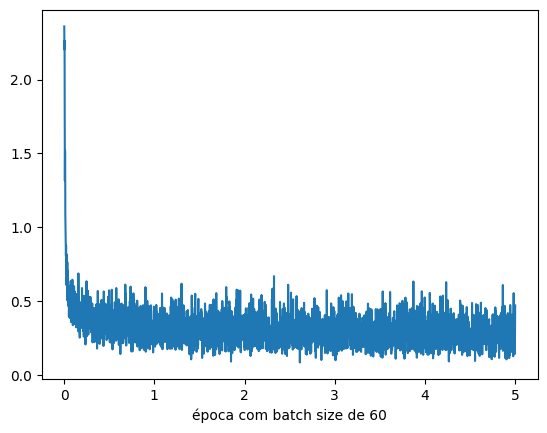

In [145]:
plt.plot(epochs, losses)
plt.xlabel('época com batch size de 60')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

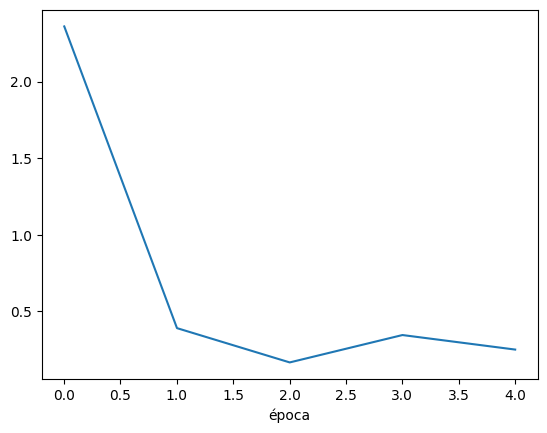

In [146]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

**Considerando Batch size de 100**

1. Qual é o tamanho do mini-batch?
    R= 600
2. Em uma época, quantos mini-batches existem?
    R=600
3. Qual é a definição de época?
    R= Época se refere a um ciclo do nosso laço de treinamento. Cada época ele treina nosso modelo e o melhora.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

    R= Resposta no código acima
    
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [147]:
#2 Testar algumas vezes e escrever a conclusão que chegamos

R2 = Foram considerados batch sizes de 60, 100, 1000 e 6000.

**Conclusão:** Quando alteramos o tamanho do batch e estamos com o shuffle ativo, além da alteração na ordem dos dados, temos pacotes de treinamentos com tamanhos diferentes e isso pode, a depender de como desenvolvemos o modelo, influenciar negativamente o treinamento.

Quanto maior o batch size, mais rápido fica o treinamento, mas pode gerar uma precisão menor. Quanto menor o batch size, maior precisa ser o poder computacional e pode gerar um overfitting.


# Prints dos testes com diferentes Batch sizes

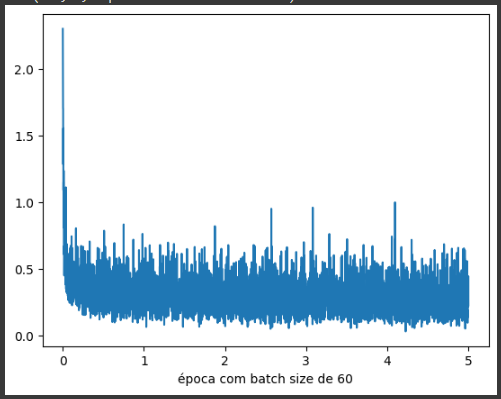

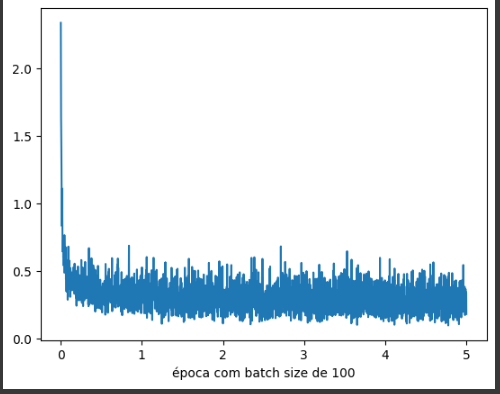

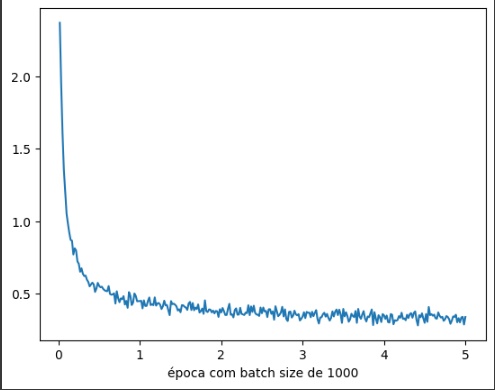)

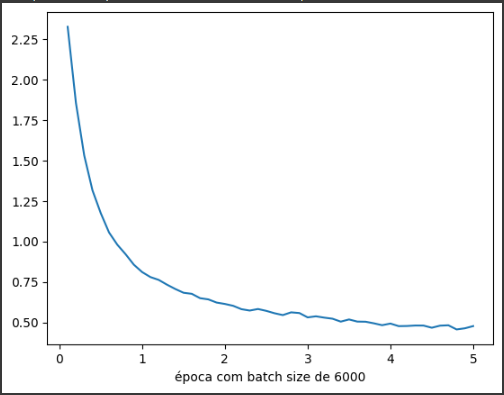)